In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("simple linear regression dataset/Linear_Regression_data.csv")
X = data['X']
Y = data['Y']

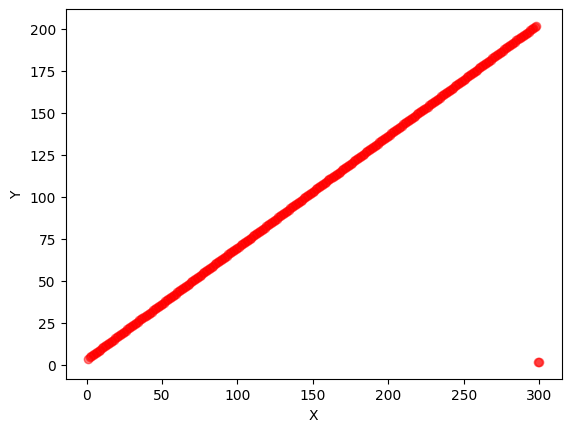

In [4]:
from matplotlib import pyplot as plt
plt.scatter(X, Y, c= "red", alpha=.5, marker= 'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [5]:
def mean_squared_error(y_true, y_predicted):
    # Calculate the mean squared error
    cost = np.sum((y_predicted - y_true) ** 2) / len(y_true)
    return cost

In [6]:
def linear_regression(X, y, learning_rate=0.01, num_iterations=2000, stopping_threshold=1e-6, verbose=True):
    # Initialize weights and bias
#    weights = np.zeros((X.shape[1], 1))
    weights = 0
    bias = 0
    curr_cost = 0
    prev_cost = 0
    
    # Number of samples
    m = len(y)
    
    # Gradient Descent
    for i in range(num_iterations):

        y_pred = np.dot(X, weights) + bias
        curr_cost = mean_squared_error(y, y_pred)
        
        if i>0 and abs(prev_cost - curr_cost) <= stopping_threshold:
            break
        
        if i>0 and curr_cost > prev_cost:
             if verbose: print("Learning rate too large....Objective function is increasing....\nReducing learning rate....")
             learning_rate = learning_rate*0.5
        prev_cost = curr_cost
        
        
        # Calculate gradients
        dW = (2/m) * np.dot(X.T, (y_pred - y))
        db = (2/m) * np.sum(y_pred - y)
        
        # Update weights and bias
        weights -= learning_rate * dW
        bias -= learning_rate * db
        
        if verbose:
            print(f"Iteration {i}: Cost {curr_cost}  Weigths: {weights}  Bias: {bias}")
    
    return weights, bias

In [7]:
# Estimate weight and bias using gradient descent
estimated_weight, estimated_bias = linear_regression(X, Y)
print(f"\nEstimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

# Make predictions using estimated parameters
Y_pred = estimated_weight * X + estimated_bias

mse = mean_squared_error(Y, Y_pred)
print(f"Mean Squared Error: {mse}")

Iteration 0: Cost 13782.64642151399  Weigths: 403.67448891471025  Bias: 2.0443111112345336
Learning rate too large....Objective function is increasing....
Reducing learning rate....
Iteration 1: Cost 4897029368.529422  Weigths: -121106.09615345036  Bias: -604.4840822608996
Learning rate too large....Objective function is increasing....
Reducing learning rate....
Iteration 2: Cost 442229967658276.56  Weigths: 18136294.613620117  Bias: 90531.38677139962
Learning rate too large....Objective function is increasing....
Reducing learning rate....
Iteration 3: Cost 9.917642556707375e+18  Weigths: -1348928480.6523805  Bias: -6733475.534531209
Learning rate too large....Objective function is increasing....
Reducing learning rate....
Iteration 4: Cost 5.48642199281966e+22  Weigths: 49490361421.01561  Bias: 247042111.86038548
Learning rate too large....Objective function is increasing....
Reducing learning rate....
Iteration 5: Cost 7.385035895075488e+25  Weigths: -883122029238.2607  Bias: -44082

Iteration 595: Cost 270.58113091030856  Weigths: 0.6689676968565812  Bias: 0.0946450852006092
Iteration 596: Cost 270.58096861755064  Weigths: 0.6689674158241891  Bias: 0.09470138489200024
Iteration 597: Cost 270.5808063279465  Weigths: 0.6689671347945276  Bias: 0.09475768403634767
Iteration 598: Cost 270.58064404149616  Weigths: 0.6689668537675969  Bias: 0.09481398263365681
Iteration 599: Cost 270.5804817581996  Weigths: 0.6689665727433968  Bias: 0.09487028068393297
Iteration 600: Cost 270.58031947805665  Weigths: 0.6689662917219273  Bias: 0.09492657818718146
Iteration 601: Cost 270.58015720106744  Weigths: 0.6689660107031884  Bias: 0.09498287514340761
Iteration 602: Cost 270.5799949272318  Weigths: 0.66896572968718  Bias: 0.09503917155261674
Iteration 603: Cost 270.57983265654946  Weigths: 0.6689654486739022  Bias: 0.09509546741481413
Iteration 604: Cost 270.5796703890207  Weigths: 0.668965167663355  Bias: 0.09515176273000513
Iteration 605: Cost 270.5795081246453  Weigths: 0.66896488

Iteration 1142: Cost 270.4928260830504  Weigths: 0.6688143791958476  Bias: 0.12535946983130763
Iteration 1143: Cost 270.4926655063357  Weigths: 0.6688140996531875  Bias: 0.12541547108220297
Iteration 1144: Cost 270.4925049327417  Weigths: 0.6688138201132435  Bias: 0.12547147178895451
Iteration 1145: Cost 270.49234436226817  Weigths: 0.6688135405760157  Bias: 0.12552747195156758
Iteration 1146: Cost 270.49218379491487  Weigths: 0.6688132610415042  Bias: 0.12558347157004746
Iteration 1147: Cost 270.492023230682  Weigths: 0.6688129815097086  Bias: 0.12563947064439943
Iteration 1148: Cost 270.4918626695694  Weigths: 0.6688127019806293  Bias: 0.12569546917462876
Iteration 1149: Cost 270.4917021115769  Weigths: 0.668812422454266  Bias: 0.12575146716074076
Iteration 1150: Cost 270.4915415567047  Weigths: 0.6688121429306187  Bias: 0.12580746460274073
Iteration 1151: Cost 270.4913810049525  Weigths: 0.6688118634096876  Bias: 0.12586346150063393
Iteration 1152: Cost 270.4912204563205  Weigths: 0

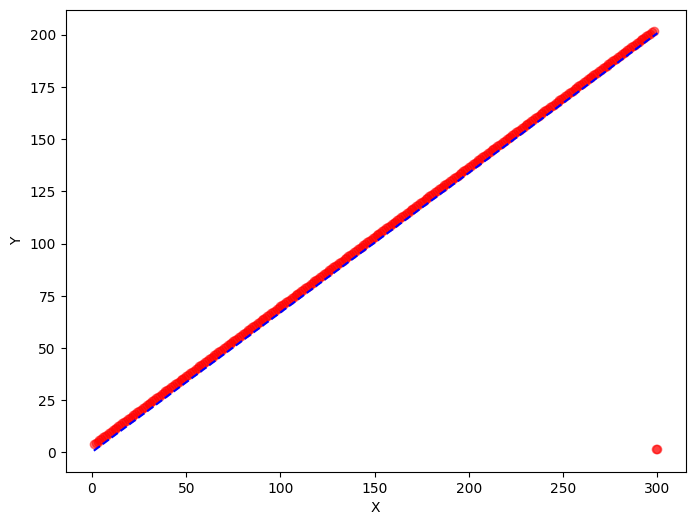

In [8]:
# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, marker='o', color='red', alpha=.5)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue', markerfacecolor='red',markersize=10, linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()